# Predicción de imágenes con redes neuronales

---

## Karina Gisele Nioletti

### Preparación del entorno, importación de la biblioteca keras y descarga del dataset MNiST


In [0]:
%tensorflow_version 2.x 

In [0]:
import tensorflow.keras as keras  #importar la biblioteca keras, una red neuronal sencilla


In [0]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


**Dimensión de los datos**



In [0]:
print('La dimensión del conjunto de datos de entrada (x) es:',x_train.ndim)
print('La dimensión del conjunto de datos de salida (y) es:',y_train.ndim)
print(x_train.shape)
print(y_train.shape)


La dimensión del conjunto de datos de entrada (x) es: 4
La dimensión del conjunto de datos de salida (y) es: 2
(50000, 32, 32, 3)
(50000, 1)


**Tipo de datos**

In [0]:
print('El tipo de datos de x_train es:',x_train.dtype)
print('El tipo de datos de y_train es:',y_train.dtype)
print('El tipo de datos de x_test es:',x_test.dtype)
print('El tipo de datos de y_test es:',y_test.dtype)

El tipo de datos de x_train es: uint8
El tipo de datos de y_train es: uint8
El tipo de datos de x_test es: uint8
El tipo de datos de y_test es: int64


**Rango de valores**

In [0]:
print('El mínimo valor de las imágenes de entrada es:', x_train.min())
print('El máximo valor de las imágenes entrada es:', x_train.max())
print ('El mínimo valor de la etiqueta de salida es:',y_train.min())
print ('El máximo valor de la etiqueta de salida es:',y_train.max())

El mínimo valor de las imágenes de entrada es: 0
El máximo valor de las imágenes entrada es: 255
El mínimo valor de la etiqueta de salida es: 0
El máximo valor de la etiqueta de salida es: 9


**Cambiar a float**




In [0]:
import numpy as np
x_train=x_train.astype(np.float32)
y_train=y_train.astype(np.float32)

x_test=x_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [0]:
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)

float32
float32
float32
float32


**Normalizar**

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

**Codificación one hot**

In [0]:
n_clases=10
y_train_onehot=keras.utils.to_categorical(y_train,n_clases)
y_test_onehot=keras.utils.to_categorical(y_test,n_clases)

### Se define el modelo

In [0]:
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),
                              activation='relu',
                              input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,(3,3),
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

### Se muestra el resumen de la red

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

Número de parámetros de la primera capa: parámetros de pesos + parámetros de bias.

Pesos= 3 ancho de filter x 3 altura del filter x 32 filtros x 3 colores

Bias = 32 (1 x filtro)

Número de parámetros = 9x32x3 + 32 = 896


### Entrenamiento del modelo

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history=model.fit(x_train, y_train_onehot,
                  epochs=8,
                  batch_size=128,
                  validation_data=(x_test,y_test_onehot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 48s 957us/sample - loss: 1.7568 - accuracy: 0.3507 - val_loss: 1.5063 - val_accuracy: 0.4545
Epoch 2/8
50000/50000 [==============================] - 48s 958us/sample - loss: 1.4231 - accuracy: 0.4835 - val_loss: 1.3455 - val_accuracy: 0.5149
Epoch 3/8
50000/50000 [==============================] - 48s 956us/sample - loss: 1.3043 - accuracy: 0.5321 - val_loss: 1.2743 - val_accuracy: 0.5447
Epoch 4/8
50000/50000 [==============================] - 48s 962us/sample - loss: 1.2254 - accuracy: 0.5650 - val_loss: 1.2124 - val_accuracy: 0.5638
Epoch 5/8
50000/50000 [==============================] - 48s 962us/sample - loss: 1.1588 - accuracy: 0.5928 - val_loss: 1.1883 - val_accuracy: 0.5871
Epoch 6/8
50000/50000 [==============================] - 48s 959us/sample - loss: 1.1098 - accuracy: 0.6104 - val_loss: 1.1186 - val_accuracy: 0.6062
Epoch 7/8
50000/50000 [===========================

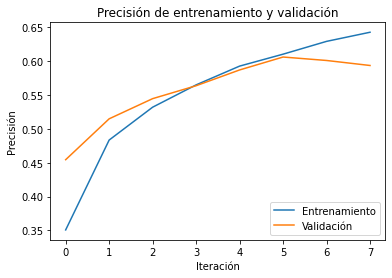

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión de entrenamiento y validación')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

###  Mejoras
**Modelo 2**
Se agregaron capas convolucionales, se aumentaron los filtros de las mismas, se aumentó el número de neuronas de la última capa totalmente conectada y se agregó Dropout. 

In [0]:
model2=keras.models.Sequential()

model2.add(keras.layers.Conv2D(64,kernel_size=(3,3),
                              activation='relu',
                              input_shape=(32,32,3)))
model2.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model2.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model2.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model2.add(keras.layers.Conv2D(128,(3,3), activation='relu'))

model2.add(keras.layers.Flatten())

model2.add(keras.layers.Dense(128,activation='relu'))
model2.add(keras.layers.Dense(10,activation='softmax'))



In [0]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model2.fit(x_train, y_train_onehot,
                  epochs=8,
                  batch_size=128,
                  validation_data=(x_test,y_test_onehot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 332s 7ms/sample - loss: 1.6347 - accuracy: 0.3982 - val_loss: 1.4747 - val_accuracy: 0.4785
Epoch 2/8
50000/50000 [==============================] - 332s 7ms/sample - loss: 1.2042 - accuracy: 0.5715 - val_loss: 1.1853 - val_accuracy: 0.5779
Epoch 3/8
50000/50000 [==============================] - 329s 7ms/sample - loss: 1.0089 - accuracy: 0.6432 - val_loss: 0.9541 - val_accuracy: 0.6663
Epoch 4/8
50000/50000 [==============================] - 328s 7ms/sample - loss: 0.8582 - accuracy: 0.6974 - val_loss: 0.9281 - val_accuracy: 0.6823
Epoch 5/8
50000/50000 [==============================] - 329s 7ms/sample - loss: 0.7667 - accuracy: 0.7311 - val_loss: 0.8117 - val_accuracy: 0.7221
Epoch 6/8
50000/50000 [==============================] - 330s 7ms/sample - loss: 0.6949 - accuracy: 0.7562 - val_loss: 0.7720 - val_accuracy: 0.7315
Epoch 7/8
50000/50000 [==============================] -

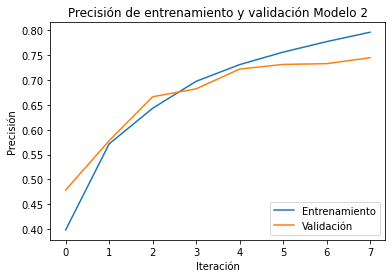

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión de entrenamiento y validación Modelo 2')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

**Modelo 3**

In [0]:
model3=keras.models.Sequential()

model3.add(keras.layers.Conv2D(64,kernel_size=(3,3),
                              activation='relu',
                              input_shape=(32,32,3)))
model3.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model3.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(keras.layers.Conv2D(128,(3,3), activation='relu'))

model3.add(keras.layers.Flatten())

#model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.4))
model3.add(keras.layers.Dense(128,activation='relu'))
model3.add(keras.layers.Dense(10,activation='softmax'))



In [0]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history3=model3.fit(x_train, y_train_onehot,
                  epochs=8,
                  batch_size=128,
                  validation_data=(x_test,y_test_onehot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 333s 7ms/sample - loss: 1.6885 - accuracy: 0.3694 - val_loss: 1.3317 - val_accuracy: 0.5147
Epoch 2/8
50000/50000 [==============================] - 330s 7ms/sample - loss: 1.2584 - accuracy: 0.5473 - val_loss: 1.1439 - val_accuracy: 0.5914
Epoch 3/8
50000/50000 [==============================] - 335s 7ms/sample - loss: 1.0864 - accuracy: 0.6128 - val_loss: 0.9702 - val_accuracy: 0.6539
Epoch 4/8
50000/50000 [==============================] - 335s 7ms/sample - loss: 0.9628 - accuracy: 0.6583 - val_loss: 0.8960 - val_accuracy: 0.6878
Epoch 5/8
50000/50000 [==============================] - 334s 7ms/sample - loss: 0.8617 - accuracy: 0.6951 - val_loss: 0.8129 - val_accuracy: 0.7122
Epoch 6/8
50000/50000 [==============================] - 332s 7ms/sample - loss: 0.7923 - accuracy: 0.7204 - val_loss: 0.7908 - val_accuracy: 0.7295
Epoch 7/8
50000/50000 [==============================] -

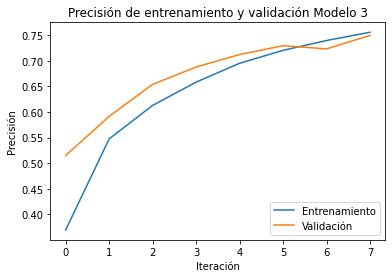

In [0]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Precisión de entrenamiento y validación Modelo 3')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

**Modelo 4 con batch normalization**

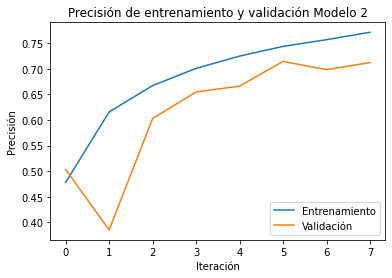

In [0]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Precisión de entrenamiento y validación Modelo 2')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

### Aumento de datos de entrenamiento con imágenes reflejadas

Se aumentan los datos de entrenamiento a través de reflejar las imágene horizontalmente y añadirlas al dataset.

In [0]:
x_train_ext=np.concatenate((x_train,np.flip(x_train,2)),axis=0)
y_train_ext=np.concatenate((y_train,y_train),axis=0)

Se codifican las etiquetas del nuevo conjunto de datos y_train_ext en onehot.

In [0]:
n_clases=10
y_train_ext_onehot=keras.utils.to_categorical(y_train_ext,n_clases)


Se reutiliza el modelo previamente definido

In [0]:
model5=keras.models.Sequential()

model5.add(keras.layers.Conv2D(64,kernel_size=(3,3),
                              activation='relu',
                              input_shape=(32,32,3)))
model5.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model5.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model5.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model5.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model5.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model5.add(keras.layers.Conv2D(128,(3,3), activation='relu'))

model5.add(keras.layers.Flatten())

model5.add(keras.layers.Dropout(0.4))
model5.add(keras.layers.Dense(128,activation='relu'))
model5.add(keras.layers.Dense(10,activation='softmax'))

In [0]:
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history5=model5.fit(x_train_ext, y_train_ext_onehot,
                  epochs=8,
                  batch_size=128,
                  validation_data=(x_test,y_test_onehot))

Epoch 1/8
782/782 [==============================] - 641s 820ms/step - loss: 1.4403 - accuracy: 0.4743 - val_loss: 1.1172 - val_accuracy: 0.6070
Epoch 2/8
782/782 [==============================] - 646s 826ms/step - loss: 0.9866 - accuracy: 0.6495 - val_loss: 0.9034 - val_accuracy: 0.6872
Epoch 3/8
782/782 [==============================] - 655s 838ms/step - loss: 0.8139 - accuracy: 0.7137 - val_loss: 0.7512 - val_accuracy: 0.7391
Epoch 4/8
782/782 [==============================] - 650s 831ms/step - loss: 0.7205 - accuracy: 0.7456 - val_loss: 0.7312 - val_accuracy: 0.7480
Epoch 5/8
782/782 [==============================] - 647s 828ms/step - loss: 0.6555 - accuracy: 0.7701 - val_loss: 0.6653 - val_accuracy: 0.7768
Epoch 6/8
782/782 [==============================] - 645s 825ms/step - loss: 0.6105 - accuracy: 0.7862 - val_loss: 0.6700 - val_accuracy: 0.7695
Epoch 7/8
782/782 [==============================] - 645s 825ms/step - loss: 0.5744 - accuracy: 0.8000 - val_loss: 0.6171 - val_ac

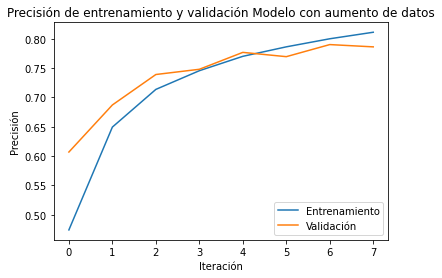

In [0]:
import matplotlib.pyplot as plt
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Precisión de entrenamiento y validación Modelo con aumento de datos')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.legend(['Entrenamiento','Validación'],loc='lower right')
plt.show()

### Predicción de imágenes

**Predicción con imagen de gato:**

In [0]:
from PIL import Image, ImageOps
!wget https://static2.diariouno.com.ar/media/2019/10/gato-2-700x395.jpg

img=Image.open('gato-2-700x395.jpg')
img=ImageOps.fit(img,(32,32),Image.ANTIALIAS)

img = np.asarray(img, dtype = 'float32') / 255.  

img=img[np.newaxis,:]

names =('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

pred = model5.predict(img)
print(names[np.argmax(pred)], pred.max())


--2020-03-29 21:03:40--  https://static2.diariouno.com.ar/media/2019/10/gato-2-700x395.jpg
Resolving static2.diariouno.com.ar (static2.diariouno.com.ar)... 104.22.46.190, 104.22.47.190, 2606:4700:10::6816:2fbe, ...
Connecting to static2.diariouno.com.ar (static2.diariouno.com.ar)|104.22.46.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘gato-2-700x395.jpg.2’

gato-2-700x395.jpg.     [ <=>                ]  42.72K  --.-KB/s    in 0.02s   

2020-03-29 21:03:40 (2.76 MB/s) - ‘gato-2-700x395.jpg.2’ saved [43744]

airplane 0.5385398


In [0]:
import pandas as pd
df=pd.DataFrame(pred, columns=names) 
df.head()

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,0.53854,0.000107,0.162534,0.253982,0.020715,0.007152,0.006597,0.005884,0.0029,0.001589


Se obtuvo como resultado de predicción: un avión

**Predicción con otra imagen de gato**

In [0]:
!wget https://estaticos.miarevista.es/media/cache/760x570_thumb/uploads/images/article/57725157a1d4251a098bc9a3/ppal-ronroneogato_0.jpg

img=Image.open('ppal-ronroneogato_0.jpg')
img=ImageOps.fit(img,(32,32),Image.ANTIALIAS)

img = np.asarray(img, dtype = 'float32') / 255.  

img=img[np.newaxis,:]

names =('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

pred = model5.predict(img)
print(names[np.argmax(pred)], pred.max())

df=pd.DataFrame(pred, columns=names) 
df.head()

--2020-03-29 21:02:05--  https://estaticos.miarevista.es/media/cache/760x570_thumb/uploads/images/article/57725157a1d4251a098bc9a3/ppal-ronroneogato_0.jpg
Resolving estaticos.miarevista.es (estaticos.miarevista.es)... 185.152.67.178
Connecting to estaticos.miarevista.es (estaticos.miarevista.es)|185.152.67.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘ppal-ronroneogato_0.jpg.1’

ppal-ronroneogato_0     [ <=>                ]  32.28K  --.-KB/s    in 0.06s   

2020-03-29 21:02:05 (563 KB/s) - ‘ppal-ronroneogato_0.jpg.1’ saved [33054]

cat 0.9805659


,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,5.198917e-07,6.027731e-08,0.000002,0.980566,0.000045,0.019131,0.000026,0.000004,0.000225,6.354699e-08


Se obtuvo la predicción de que es un gato con un 98% de probabilidad.


**Predicción con imagen de auto**

In [0]:

!wget http://ecologiteca.com/wp-content/uploads/2014/07/auto.jpg

img=Image.open('auto.jpg')
img=ImageOps.fit(img,(32,32),Image.ANTIALIAS)

img = np.asarray(img, dtype = 'float32') / 255.  

img=img[np.newaxis,:]

names =('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

pred = model5.predict(img)
print(names[np.argmax(pred)], pred.max())

df=pd.DataFrame(pred, columns=names) 
df.head()

--2020-03-29 20:55:40--  http://ecologiteca.com/wp-content/uploads/2014/07/auto.jpg
Resolving ecologiteca.com (ecologiteca.com)... 198.136.62.177
Connecting to ecologiteca.com (ecologiteca.com)|198.136.62.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55697 (54K) [image/jpeg]
Saving to: ‘auto.jpg.1’

auto.jpg.1          100%[===================>]  54.39K   350KB/s    in 0.2s    

2020-03-29 20:55:41 (350 KB/s) - ‘auto.jpg.1’ saved [55697/55697]

automobile 0.999747


,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,0.000005,0.999747,2.820974e-10,1.958896e-11,5.284862e-16,2.714893e-13,5.064549e-12,4.029329e-14,6.757777e-07,0.000247


Se obtuvo que es un auto con un 99,97% de probabilidad.


**Predicción con imagen de pájaro**


In [0]:


!wget https://st.depositphotos.com/1578496/3959/i/950/depositphotos_39590521-stock-photo-tickells-blue-flycatcher-bird.jpg

img=Image.open('depositphotos_39590521-stock-photo-tickells-blue-flycatcher-bird.jpg')
img=ImageOps.fit(img,(32,32),Image.ANTIALIAS)

img = np.asarray(img, dtype = 'float32') / 255.  

img=img[np.newaxis,:]

names =('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

pred = model5.predict(img)
print(names[np.argmax(pred)], pred.max())

df=pd.DataFrame(pred, columns=names) 
df.head()

--2020-03-29 21:11:37--  https://st.depositphotos.com/1578496/3959/i/950/depositphotos_39590521-stock-photo-tickells-blue-flycatcher-bird.jpg
Resolving st.depositphotos.com (st.depositphotos.com)... 104.72.42.48
Connecting to st.depositphotos.com (st.depositphotos.com)|104.72.42.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127190 (124K) [image/jpeg]
Saving to: ‘depositphotos_39590521-stock-photo-tickells-blue-flycatcher-bird.jpg’

depositphotos_39590 100%[===================>] 124.21K  --.-KB/s    in 0.1s    

2020-03-29 21:11:37 (1.05 MB/s) - ‘depositphotos_39590521-stock-photo-tickells-blue-flycatcher-bird.jpg’ saved [127190/127190]

bird 0.97474456


,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,0.018546,0.003326,0.974745,0.000237,0.000076,0.000155,0.000081,0.00021,0.002433,0.000192


**Predicción con imagen de avión**

In [0]:
!wget https://ep01.epimg.net/elpais/imagenes/2015/12/28/paco_nadal/1451287800_145128_1451287800_noticia_normal.jpg

img=Image.open('1451287800_145128_1451287800_noticia_normal.jpg')
img=ImageOps.fit(img,(32,32),Image.ANTIALIAS)

img = np.asarray(img, dtype = 'float32') / 255.  

img=img[np.newaxis,:]

names =('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

pred = model5.predict(img)
print(names[np.argmax(pred)], pred.max())

df=pd.DataFrame(pred, columns=names) 
df.head()

--2020-03-29 21:15:14--  https://ep01.epimg.net/elpais/imagenes/2015/12/28/paco_nadal/1451287800_145128_1451287800_noticia_normal.jpg
Resolving ep01.epimg.net (ep01.epimg.net)... 104.114.79.25, 104.114.79.19
Connecting to ep01.epimg.net (ep01.epimg.net)|104.114.79.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151291 (148K) [image/jpeg]
Saving to: ‘1451287800_145128_1451287800_noticia_normal.jpg’

1451287800_145128_1 100%[===================>] 147.75K  --.-KB/s    in 0.04s   

2020-03-29 21:15:14 (3.64 MB/s) - ‘1451287800_145128_1451287800_noticia_normal.jpg’ saved [151291/151291]

airplane 0.9670778


,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,0.967078,0.000153,0.021953,0.00521,0.00018,0.000107,0.000079,0.000015,0.005082,0.000143
